<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.275845,73.249241,50.735909,-1409.446223,-1199.185227,65.953413,-1265.138640
1,0.0,1.0,63.482924,78.547486,98.498940,-1845.004898,-1594.475547,134.340967,-1728.816515
2,0.0,2.0,87.688074,66.724858,88.246047,583.712634,836.371613,129.716658,706.654955
3,0.0,3.0,62.803674,82.389309,43.739748,-648.658453,-449.725722,46.662734,-496.388456
4,0.0,4.0,90.597778,26.438076,36.958282,-0.129585,163.864551,87.813245,76.051306
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,45.842469,53.956537,40.516337,1715.308908,1865.624251,136.795924,1728.828327
249996,999.0,246.0,24.356703,75.267657,26.311129,398.856334,534.791823,174.176565,360.615258
249997,999.0,247.0,37.011541,62.679037,81.196165,214.001334,404.888077,236.242393,168.645684
249998,999.0,248.0,39.603132,46.339514,95.703798,160.099500,351.745943,229.108262,122.637681


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.275845,73.249241,50.735909,-1409.446223,-1199.185227,65.953413,-1265.138640
1,0.0,1.0,63.482924,78.547486,98.498940,-1845.004898,-1594.475547,134.340967,-1728.816515
2,0.0,2.0,87.688074,66.724858,88.246047,583.712634,836.371613,129.716658,706.654955
3,0.0,3.0,62.803674,82.389309,43.739748,-648.658453,-449.725722,46.662734,-496.388456
4,0.0,4.0,90.597778,26.438076,36.958282,-0.129585,163.864551,87.813245,76.051306
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,45.842469,53.956537,40.516337,1715.308908,1865.624251,136.795924,1728.828327
249996,999.0,246.0,24.356703,75.267657,26.311129,398.856334,534.791823,174.176565,360.615258
249997,999.0,247.0,37.011541,62.679037,81.196165,214.001334,404.888077,236.242393,168.645684
249998,999.0,248.0,39.603132,46.339514,95.703798,160.099500,351.745943,229.108262,122.637681


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    76.275845  73.249241  50.735909 -1409.446223 -1199.185227   
      1.0    63.482924  78.547486  98.498940 -1845.004898 -1594.475547   
      2.0    87.688074  66.724858  88.246047   583.712634   836.371613   
      3.0    62.803674  82.389309  43.739748  -648.658453  -449.725722   
      4.0    90.597778  26.438076  36.958282    -0.129585   163.864551   
...                ...        ...        ...          ...          ...   
999.0 245.0  45.842469  53.956537  40.516337  1715.308908  1865.624251   
      246.0  24.356703  75.267657  26.311129   398.856334   534.791823   
      247.0  37.011541  62.679037  81.196165   214.001334   404.888077   
      248.0  39.603132  46.339514  95.703798   160.099500   351.745943   
      249.0  34.450773  56.528184  32.773262   234.049578   367.801797   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     65.953413 -1265.138640  
      1.0    134.340967 -1728.816515  
      2.0    129.716658   706.654955  
      3.0     46.662734  -496.388456  
      4.0     87.813245    76.051306  
...                 ...          ...  
999.0 245.0  136.795924  1728.828327  
      246.0  174.176565   360.615258  
      247.0  236.242393   168.645684  
      248.0  229.108262   122.637681  
      249.0  139.898221   227.903576  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    76.275845  73.249241  50.735909 -1409.446223 -1199.185227   
      1.0    63.482924  78.547486  98.498940 -1845.004898 -1594.475547   
      2.0    87.688074  66.724858  88.246047   583.712634   836.371613   
      3.0    62.803674  82.389309  43.739748  -648.658453  -449.725722   
      4.0    90.597778  26.438076  36.958282    -0.129585   163.864551   
...                ...        ...        ...          ...          ...   
999.0 245.0  45.842469  53.956537  40.516337  1715.308908  1865.624251   
      246.0  24.356703  75.267657  26.311129   398.856334   534.791823   
      247.0  37.011541  62.679037  81.196165   214.001334   404.888077   
      248.0  39.603132  46.339514  95.703798   160.099500   351.745943   
      249.0  34.450773  56.528184  32.773262   234.049578   367.801797   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     65.953413 -1265.138640  
      1.0    134.340967 -1728.816515  
      2.0    129.716658   706.654955  
      3.0     46.662734  -496.388456  
      4.0     87.813245    76.051306  
...                 ...          ...  
999.0 245.0  136.795924  1728.828327  
      246.0  174.176565   360.615258  
      247.0  236.242393   168.645684  
      248.0  229.108262   122.637681  
      249.0  139.898221   227.903576  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.275845,73.249241,50.735909,-1409.446223,-1199.185227,65.953413,-1265.138640
1,0.0,1.0,63.482924,78.547486,98.498940,-1845.004898,-1594.475547,134.340967,-1728.816515
2,0.0,2.0,87.688074,66.724858,88.246047,583.712634,836.371613,129.716658,706.654955
3,0.0,3.0,62.803674,82.389309,43.739748,-648.658453,-449.725722,46.662734,-496.388456
4,0.0,4.0,90.597778,26.438076,36.958282,-0.129585,163.864551,87.813245,76.051306
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,45.842469,53.956537,40.516337,1715.308908,1865.624251,136.795924,1728.828327
249996,999.0,246.0,24.356703,75.267657,26.311129,398.856334,534.791823,174.176565,360.615258
249997,999.0,247.0,37.011541,62.679037,81.196165,214.001334,404.888077,236.242393,168.645684
249998,999.0,248.0,39.603132,46.339514,95.703798,160.099500,351.745943,229.108262,122.637681


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    76.275845  73.249241  50.735909 -1409.446223 -1199.185227   
      1.0    63.482924  78.547486  98.498940 -1845.004898 -1594.475547   
      2.0    87.688074  66.724858  88.246047   583.712634   836.371613   
      3.0    62.803674  82.389309  43.739748  -648.658453  -449.725722   
      4.0    90.597778  26.438076  36.958282    -0.129585   163.864551   
...                ...        ...        ...          ...          ...   
999.0 245.0  45.842469  53.956537  40.516337  1715.308908  1865.624251   
      246.0  24.356703  75.267657  26.311129   398.856334   534.791823   
      247.0  37.011541  62.679037  81.196165   214.001334   404.888077   
      248.0  39.603132  46.339514  95.703798   160.099500   351.745943   
      249.0  34.450773  56.528184  32.773262   234.049578   367.801797   

                  y_hat        e_hat  
rep   index                           
0.0   0.0     65.953413 -1265.138640  
      1.0    134.340967 -1728.816515  
      2.0    129.716658   706.654955  
      3.0     46.662734  -496.388456  
      4.0     87.813245    76.051306  
...                 ...          ...  
999.0 245.0  136.795924  1728.828327  
      246.0  174.176565   360.615258  
      247.0  236.242393   168.645684  
      248.0  229.108262   122.637681  
      249.0  139.898221   227.903576  

[250000 rows x 7 columns]

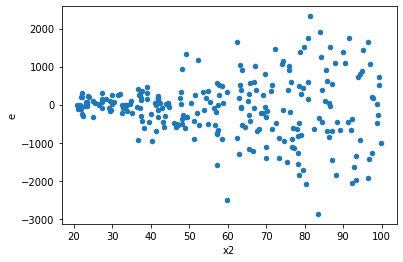

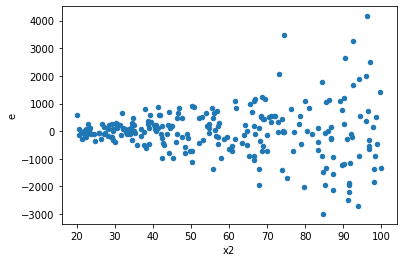

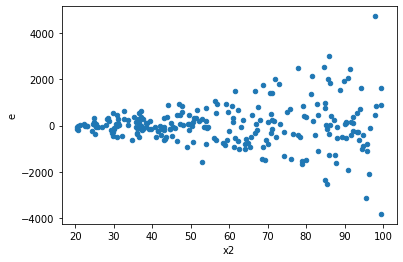

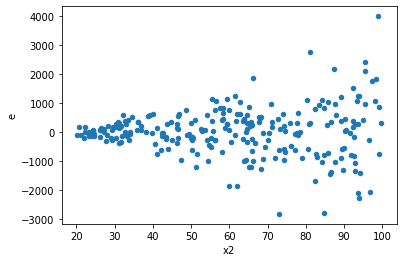

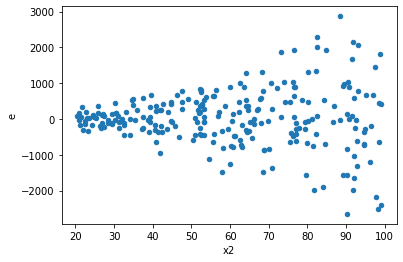

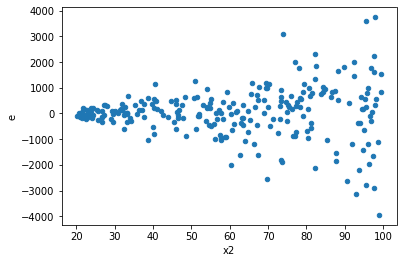

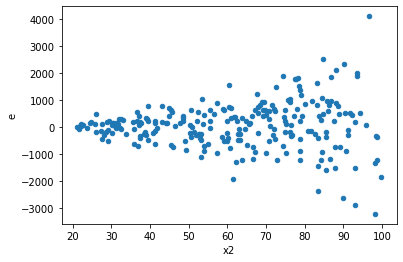

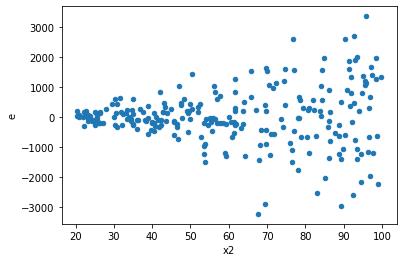

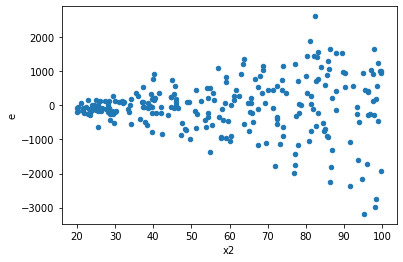

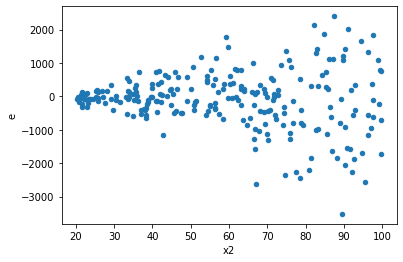

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,97.0,97.0,38657300.20870795,102782135.14574885,398528.8681310098,1059609.6406778232,2.658802725250744,2.4473983537554034e-06,0.9999987763008231,1.2236991768777017e-06,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,44817644.034454115,95460947.01326422,462037.5673655063,984133.4743635487,2.1299858363790265,0.0002415114813143493,0.9998792442593428,0.00012075574065717465,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,46390895.56974639,65670945.28860064,478256.6553582102,677020.054521656,1.4155998603188777,0.08859790809563273,0.9557010459521836,0.044298954047816363,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,58898191.58078854,107689307.60694781,607197.8513483354,1110199.0474943074,1.8283975231944816,0.0032613237571461617,0.9983693381214269,0.0016306618785730809,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,26196303.45768676,121681539.64590058,270064.9840998635,1254448.8623288719,4.6449889329784675,5.355715870791755e-13,0.9999999999997322,2.6778579353958776e-13,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,58305052.52129686,118890022.80666026,601083.0156834727,1225670.3382129925,2.0391032623327763,0.0005326533054008653,0.9997336733472996,0.00026632665270043265,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,19968212.82101335,126258876.39905983,205857.86413415824,1301637.9010212354,6.322993325982211,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,97.0,97.0,22263120.0025004,149125267.15966442,229516.70105670515,1537373.888243963,6.698309452714443,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
11.0,97.0,97.0,57683569.91404251,142719357.6053335,594675.9784952836,1471333.5835601392,2.4741769245212724,1.2030645306415622e-05,0.9999939846773468,6.015322653207811e-06,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,78891764.81127776,35162694.19400999,813317.1630028635,362502.002000103,0.445708044155496,8.959108842840524e-05,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,88932703.3268386,41104221.0599208,916831.9930601917,423754.8562878433,0.46219466542985593,0.00018015517999974898,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,38657300.20870795,102782135.14574885,398528.8681310098,1059609.6406778232,2.658802725250744,2.4473983537554034e-06,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,44817644.034454115,95460947.01326422,462037.5673655063,984133.4743635487,2.1299858363790265,0.0002415114813143493,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,46390895.56974639,65670945.28860064,478256.6553582102,677020.054521656,1.4155998603188777,0.08859790809563273,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,58898191.58078854,107689307.60694781,607197.8513483354,1110199.0474943074,1.8283975231944816,0.0032613237571461617,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,26196303.45768676,121681539.64590058,270064.9840998635,1254448.8623288719,4.6449889329784675,5.355715870791755e-13,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,58305052.52129686,118890022.80666026,601083.0156834727,1225670.3382129925,2.0391032623327763,0.0005326533054008653,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,19968212.82101335,126258876.39905983,205857.86413415824,1301637.9010212354,6.322993325982211,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    730
Reject001=1 : Homoscedasticity      270
Name: Result_test, dtype: int64